##NAMA  : FIRAZ AFIFUDIN
##NIM   : 221351051

In [1]:
## Unggah Berkas
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"firazafifudin","key":"f2080aff067f6da7eef153a5d8b364c1"}'}

In [2]:
## Mengakses Data Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
## Mengunduh Dataset Dari Kaggle
!kaggle datasets download -d hgultekin/bbcnewsarchive

Dataset URL: https://www.kaggle.com/datasets/hgultekin/bbcnewsarchive
License(s): copyright-authors
bbcnewsarchive.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
## Persiapan dan Pemuatan Data
!mkdir bbcnewsarchive
!unzip bbcnewsarchive -d bbcnewsarchive
!ls bbcnewsarchive

mkdir: cannot create directory ‘bbcnewsarchive’: File exists
Archive:  bbcnewsarchive.zip
replace bbcnewsarchive/bbc-news-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: bbcnewsarchive/bbc-news-data.csv  
bbc-news-data.csv


In [5]:
## manipulasi data, pembelajaran mesin, dan visualisasi model.
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model

In [6]:
## Memuat Data
df = pd.read_csv('/content/bbcnewsarchive/bbc-news-data.csv', sep='\t')

In [7]:
## Memeriksa Beberapa Baris Pertama Data
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [8]:
## Menghapus Kolom yang Tidak Diperlukan
df = df.drop(columns=['title','filename'])

In [9]:
## Memeriksa Data
df.head()

,category,content
0,business,Quarterly profits at US media giant TimeWarne...
1,business,The dollar has hit its highest level against ...
2,business,The owners of embattled Russian oil giant Yuk...
3,business,British Airways has blamed high fuel prices f...
4,business,Shares in UK drinks and food firm Allied Dome...


In [10]:
## Persiapan dan Transformasi Data
category = pd.get_dummies(df.category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru

,content,business,entertainment,politics,sport,tech
0,Quarterly profits at US media giant TimeWarne...,True,False,False,False,False
1,The dollar has hit its highest level against ...,True,False,False,False,False
2,The owners of embattled Russian oil giant Yuk...,True,False,False,False,False
3,British Airways has blamed high fuel prices f...,True,False,False,False,False
4,Shares in UK drinks and food firm Allied Dome...,True,False,False,False,False
...,...,...,...,...,...,...
2220,BT is introducing two initiatives to help bea...,False,False,False,False,True
2221,Computer users across the world continue to i...,False,False,False,False,True
2222,A new European directive could put software w...,False,False,False,False,True
2223,The man making sure US computer networks are ...,False,False,False,False,True


In [11]:
## mempersiapkan data untuk model machine learning
content = df_baru['content'].values
category = df_baru[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [12]:
## membagi dataset menjadi set pelatihan dan set pengujian
content_latih, content_test, category_latih, category_test = train_test_split(content, category, test_size=0.2)

In [13]:
## Pra-pemrosesan Data: Tokenisasi dan Padding
Tokenizer = Tokenizer(num_words=5000, oov_token='x')
Tokenizer.fit_on_texts(content_latih)
Tokenizer.fit_on_texts(content_test)

sekuens_latih = Tokenizer.texts_to_sequences(content_latih)
sekuens_test = Tokenizer.texts_to_sequences(content_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [14]:
## Definisikan Model
input_length = padded_latih.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [15]:
## Membangun Model
model.build(input_shape=(None, input_length))

In [16]:
## Kompilasi Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
## Meringkas Model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 4436, 16)       │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,637 (459.52 KB)

 Trainable params: 117,637 (459.52 KB)

 Non-trainable params: 0 (0.00 B)

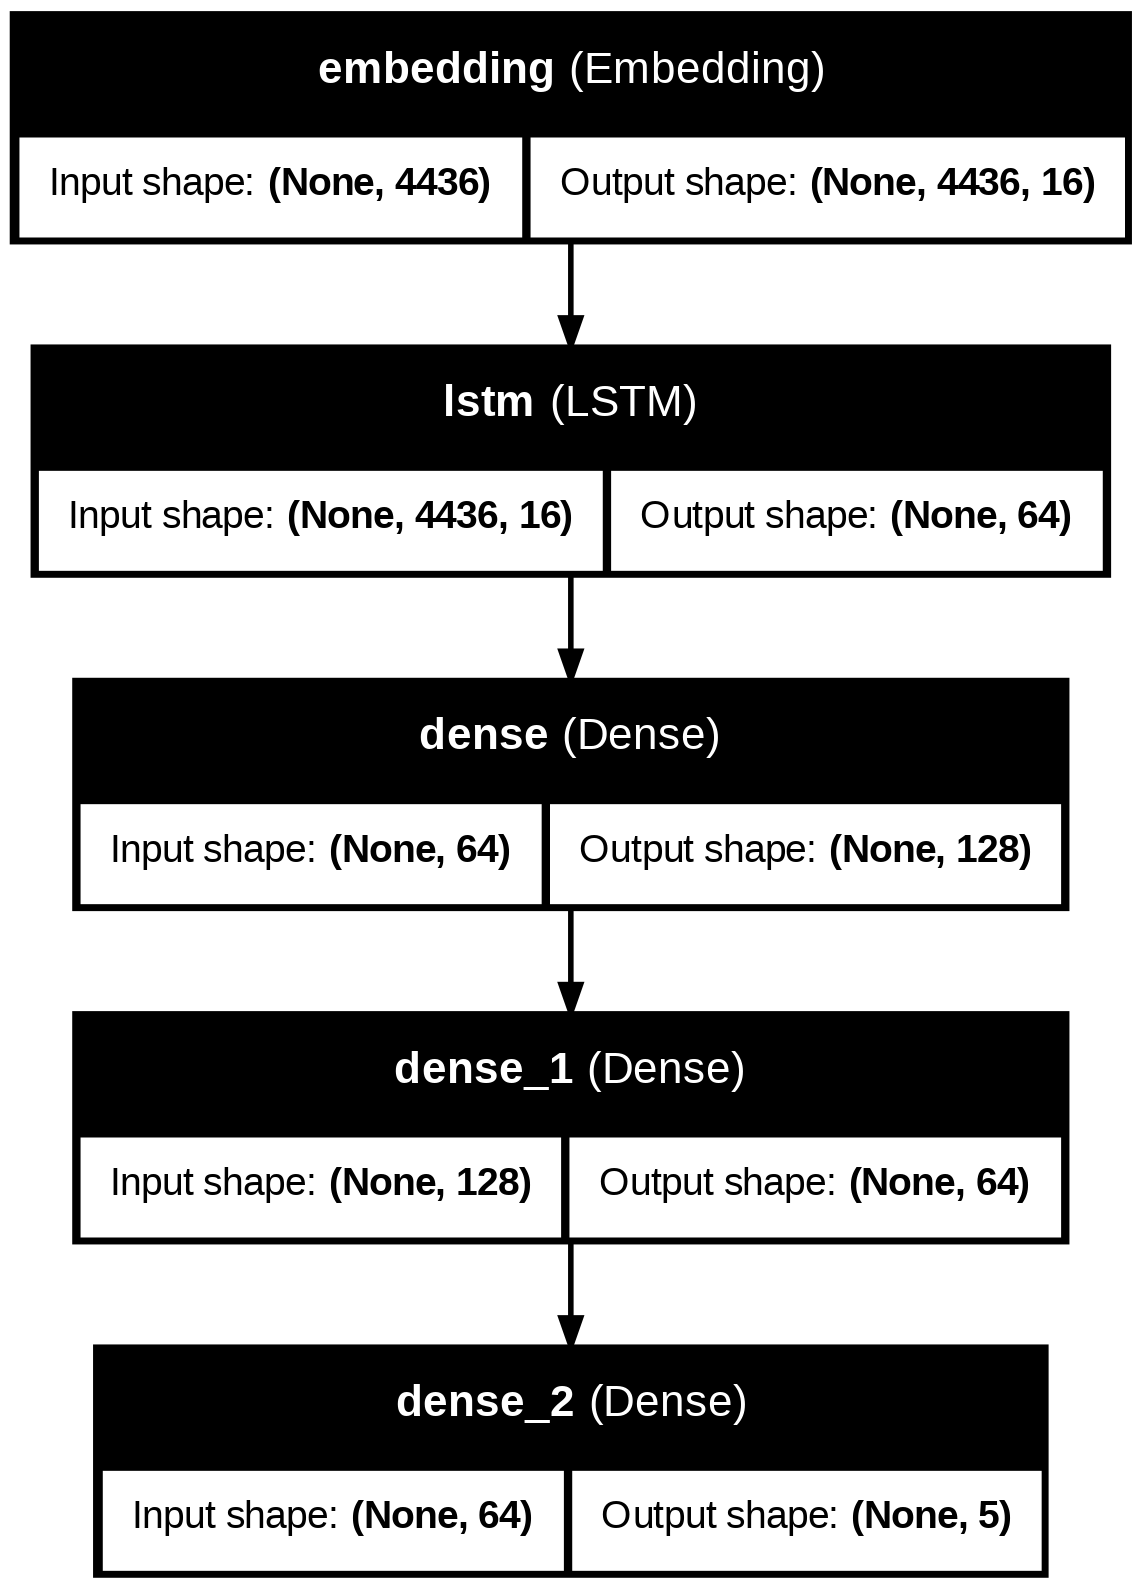

In [18]:
## Visualisasi Struktur Model
plot_model(model, show_shapes=True, show_layer_names=True)

In [19]:
## Pelatihan Model
history = model.fit(padded_latih, category_latih, epochs=15,
                    validation_data=(padded_test, category_test))

Epoch 1/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - accuracy: 0.2270 - loss: 1.6064 - val_accuracy: 0.2652 - val_loss: 1.5864
Epoch 2/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.3560 - loss: 1.6694 - val_accuracy: 0.4674 - val_loss: 1.3411
Epoch 3/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.5767 - loss: 1.0439 - val_accuracy: 0.6809 - val_loss: 0.8550
Epoch 4/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.8108 - loss: 0.4498 - val_accuracy: 0.7596 - val_loss: 0.6241
Epoch 5/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.9362 - loss: 0.2025 - val_accuracy: 0.7326 - val_loss: 0.7992
Epoch 6/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.9573 - loss: 0.1725 - val_accuracy: 0.7820 - val_loss: 0.7323
Epoch 7/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - accuracy: 0.9918 - loss: 0.0417 - val_accuracy: 0.7888 - val_loss: 0.8049
Epoch 8/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.9955 - loss: 0.0197 - val_accuracy

In [20]:
## Evaluasi dan Pelaporan Model
test_loss, test_accuracy = model.evaluate(padded_test, category_test)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7783 - loss: 1.1427
Akurasi Model: 0.7820
Loss Model: 1.0827


In [21]:
## Menguji Model
hasil = ["Carlos Alcaraz"]
hasil = Tokenizer.texts_to_sequences(hasil)
hasil = pad_sequences(hasil)
hasil = np.argmax(model.predict(hasil), axis=-1)
if hasil[0] == [0]:
  print('Business')
if hasil[0] == [1]:
  print('Entertainment')
if hasil[0] == [2]:
  print('Politics')
if hasil[0] == [3]:
  print('Sport')
if hasil[0] == [4]:
  print('Tech')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
Business
